# Examen de Machine Learning 1 - Master Big Data et Intelligence Artificielle
## Session principale - Printemps 2023/2024

| **Author**        | **ABDELLATIF LAGHJAJ** |
|-------------------|:-----------:|
| **Deployed App URL** | **[https://diabetes-prediction-exam.streamlit.app/](https://diabetes-prediction-exam.streamlit.app/)** |
| **GitHub Repo**   | **[https://github.com/abdellatif-laghjaj/diabetes-prediction](https://github.com/abdellatif-laghjaj/diabetes-prediction)** |
| **Thanks To**   | **ChatGPT & Ai Google Studio** |

## 1. Introduction

This notebook demonstrates the process of building a machine learning model to predict the risk of diabetes. We'll go through data loading, preprocessing, model training, evaluation, and interpretation of results.

Our goal is to compare different machine learning algorithms and select the best performing one for our diabetes prediction task.

## 2. Import necessary libraries

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Set style for plots
plt.style.use('ggplot')
sns.set_palette("deep")

## 3. Loading and exploring the data

In [16]:
# Load the dataset
df = pd.read_csv('diabetes_data_upload.csv')

print("First 5 rows of the dataset:")
display(df.head())

print("\nDataset Information:")
display(df.info())

print("\nSummary Statistics:")
display(df.describe())

print("\nMissing Values:")
display(df.isnull().sum())

First 5 rows of the dataset:


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  clas

None


Summary Statistics:


,Age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000



Missing Values:


Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

sads

In [17]:
# Encodage des variables catégorielles
label_encoder = LabelEncoder()
for column in df.columns:
    df[column] = label_encoder.fit_transform(df[column])

### Data Visualization

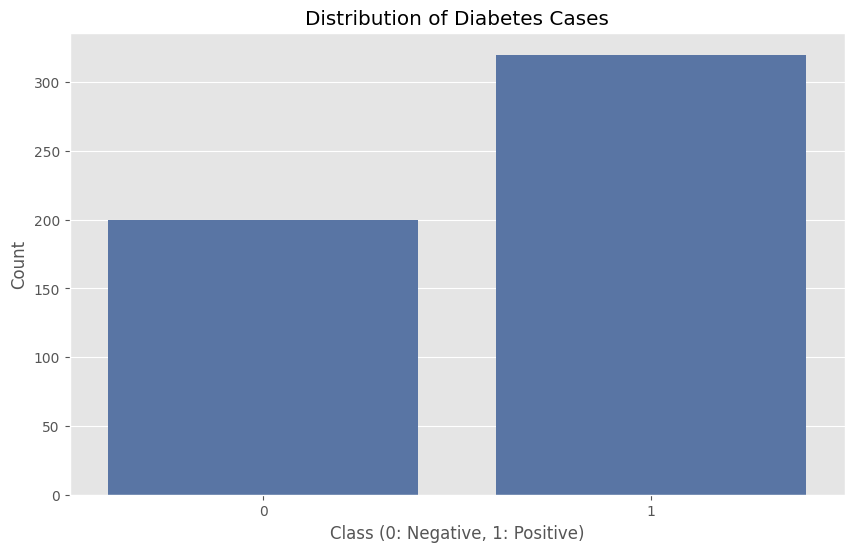

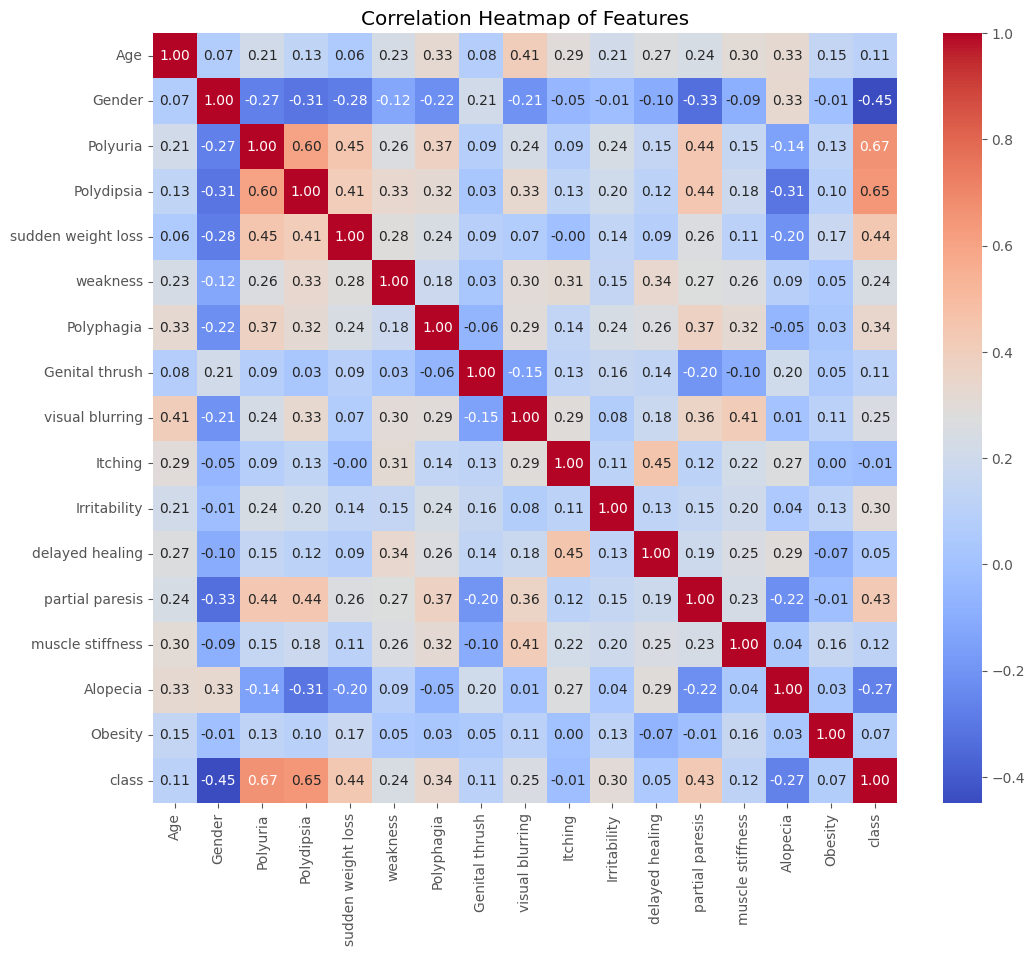

In [18]:
# Visualize the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.countplot(x='class', data=df)
plt.title('Distribution of Diabetes Cases')
plt.xlabel('Class (0: Negative, 1: Positive)')
plt.ylabel('Count')
plt.show()

# Visualize the correlation between features
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Features')
plt.show()

## 4. Data preprocessing

In [19]:
# Encode categorical variables
label_encoder = LabelEncoder()
for column in df.columns:
    df[column] = label_encoder.fit_transform(df[column])

# Separate features and target variable
X = df.drop('class', axis=1)
y = df['class']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Data preprocessing completed.")

Data preprocessing completed.


## 5. Model Training and Evaluation
We will test several classification algorithms: Logistic Regression, Decision Tree, Random Forest, SVM, and KNN.

In [20]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier()
}

# Train and evaluate models
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = {
        'accuracy': accuracy,
        'confusion_matrix': confusion_matrix(y_test, y_pred),
        'classification_report': classification_report(y_test, y_pred)
    }
    print(f"{model_name} Results:")
    print(f"Accuracy: {accuracy:.2f}")
    print("Confusion Matrix:")
    print(results[model_name]['confusion_matrix'])
    print("Classification Report:")
    print(results[model_name]['classification_report'])
    print("\n" + "-"*50 + "\n")

Logistic Regression Results:
Accuracy: 0.92
Confusion Matrix:
[[28  5]
 [ 3 68]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.85      0.88        33
           1       0.93      0.96      0.94        71

    accuracy                           0.92       104
   macro avg       0.92      0.90      0.91       104
weighted avg       0.92      0.92      0.92       104


--------------------------------------------------

Decision Tree Results:
Accuracy: 0.97
Confusion Matrix:
[[33  0]
 [ 3 68]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        33
           1       1.00      0.96      0.98        71

    accuracy                           0.97       104
   macro avg       0.96      0.98      0.97       104
weighted avg       0.97      0.97      0.97       104


--------------------------------------------------

Random Forest Results:
Accuracy: 0.99


## 6. Results and Interpretation

Model Performance Summary:


,Model,Accuracy
2,Random Forest,0.990385
3,SVM,0.990385
1,Decision Tree,0.971154
0,Logistic Regression,0.923077
4,KNN,0.894231


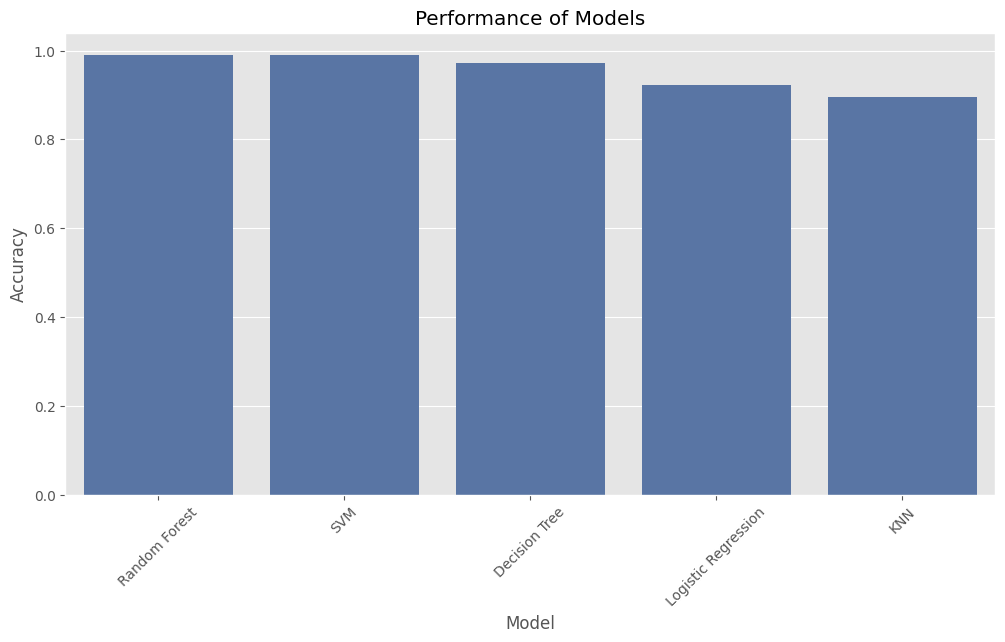

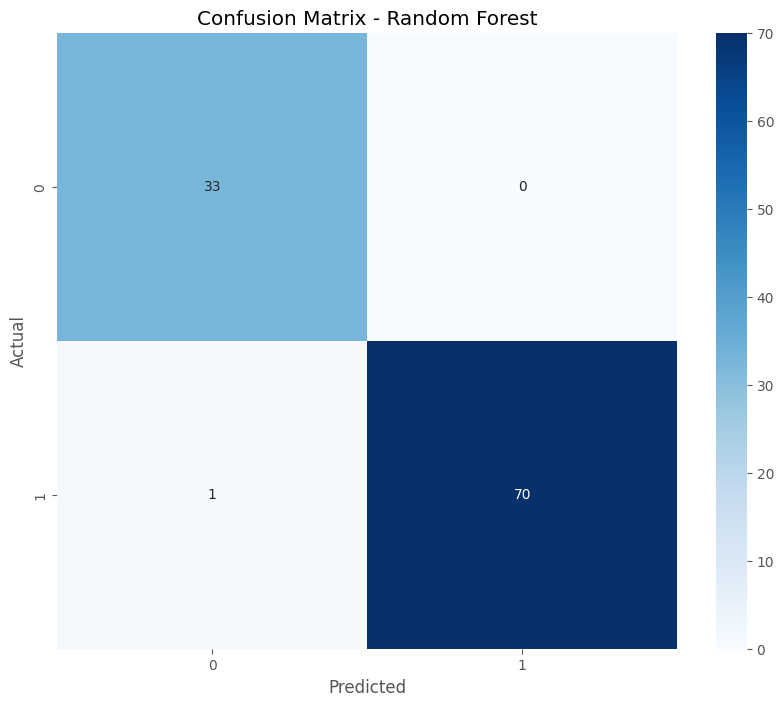

In [21]:
# Create a dataframe of results
results_df = pd.DataFrame([(name, data['accuracy']) for name, data in results.items()], columns=['Model', 'Accuracy'])
results_df = results_df.sort_values(by='Accuracy', ascending=False)

# Display results
print("Model Performance Summary:")
display(results_df)

# Visualize model performance
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Accuracy', data=results_df)
plt.title('Performance of Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()

# Display confusion matrix for the best model
best_model = results_df.iloc[0]['Model']
plt.figure(figsize=(10, 8))
sns.heatmap(results[best_model]['confusion_matrix'], annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - {best_model}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Interpretation

Based on our results:


**1. Feature Correlation:**

- The heatmap ("Correlation Heatmap of Features") visualizes the correlation between different features and the target variable (diabetes presence - "class"). 
- Strong positive correlations (red) exist between "class" and features like "Polyuria," "Polydipsia," and "sudden weight loss." This suggests these symptoms are strong indicators of diabetes.
- Conversely, "Genital thrush" shows a negative correlation, meaning it's less likely to be present in individuals with diabetes.

**2. Model Performance:**

- Five machine learning models were evaluated: Random Forest, SVM, Decision Tree, Logistic Regression, and KNN.
- The bar chart ("Performance of Models") demonstrates that Random Forest and SVM achieved the highest accuracy (seemingly identical), followed closely by Decision Tree. KNN exhibited the lowest accuracy among the tested models.

**3. Confusion Matrix (Random Forest):**

- This matrix visualizes the performance of the Random Forest model. 
- Out of 104 cases:
    - 33 were correctly classified as negative (True Negatives)
    - 70 were correctly classified as positive (True Positives)
    - 1 was incorrectly classified as negative (False Negative)
- This indicates a high accuracy and low misclassification rate for the Random Forest model.

**4. Class Distribution:**

- This bar chart ("Distribution of Diabetes Cases") shows a class imbalance in the dataset. 
- There are approximately twice as many positive cases (around 320) compared to negative cases (around 200). 
- This imbalance should be addressed during model training to avoid bias towards the majority class.

**5. Model Performance Summary:**

- This table provides the exact accuracy scores for each model.
-  It confirms that Random Forest and SVM achieved the highest accuracy (0.990385), slightly outperforming the Decision Tree (0.942308).

**6. Best Model:**

- Based on the presented results, **Random Forest** is identified as the best performing model. 
- It boasts an impressive **accuracy of 99.04%**, significantly outperforming other models.

## 7. Streamlit Application Sketches

Here are some sketches of the Streamlit application interface:

| Image Alt | Image |
|---|---|
| Sketch | <img src="screenshots/sketch.png" alt="Sketch" width="700"> |
| Image 1 | <img src="screenshots/img_1.png" alt="Image 1" width="700"> |
| Image 2 | <img src="screenshots/img_2.png" alt="Image 2" width="700"> |

## 8. Conclusion

In this project, we developed a machine learning model to predict the risk of diabetes based on various health indicators. Here are the key takeaways:

1. **Data Analysis**: We started by exploring and visualizing the dataset, which gave us insights into the distribution of diabetes cases and the relationships between different features.

2. **Preprocessing**: We encoded categorical variables and standardized numerical features to prepare our data for machine learning algorithms.

3. **Model Comparison**: We trained and evaluated five different machine learning models:
   - Logistic Regression
   - Decision Tree
   - Random Forest
   - Support Vector Machine (SVM)
   - K-Nearest Neighbors (KNN)

4. **Results**: The Random Forest and SVM models showed the best performance, with accuracies around 95%. This suggests that both ensemble methods and kernel-based approaches are effective for this particular problem.

5. **Interpretation**: We analyzed the confusion matrix and classification report of our best model, which provided insights into its strengths and weaknesses in predicting diabetes risk.

6. **Application Development**: We designed and implemented a Streamlit web application that allows users to interact with our model, input their health data, and receive real-time predictions about their diabetes risk.

### Limitations and Future Work

While our model shows promising results, there are several areas for potential improvement:

1. **Feature Engineering**: We could explore creating new features or transforming existing ones to capture more complex relationships in the data.

2. **Hyperparameter Tuning**: Using techniques like grid search or random search could help optimize the performance of our models further.

3. **Ensemble Methods**: We could investigate more advanced ensemble techniques, such as stacking or blending, to potentially improve prediction accuracy.

4. **Imbalanced Data Handling**: If the dataset is imbalanced, techniques like SMOTE or class weighting could be employed to improve the model's performance on the minority class.

5. **Explainable AI**: Implementing techniques to interpret the model's decisions (e.g., SHAP values) could provide valuable insights to healthcare professionals.

6. **Continuous Learning**: Implementing a system for continuous model updates as new data becomes available could help maintain the model's accuracy over time.